# 1. 선형 회귀

- 선형 함수로 이루어진 모델

## 1. 정규 방정식(Normal Equation)

- 결과를 바로 얻을 수 있는 수학 공식
- 유사역행렬(Pseudoinverse) : 특잇값 분해라 부르는 표준 행렬 분해 기법을 사용해 계산

## 2. 계산 복잡도(Computational Complexity)

- 특성 수 2배 증가 → 계산 시간 2배 증가

# 2. 경사 하강법(Gradient Descent)

- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것
- 파라미터 벡터에 대해 비용 함수의 현재 그레이디언트를 계산 → 감소 방향으로 진행
- 중요 파라미터 : 스텝 크기 → 학습률 하이퍼파라미터로 결정

## 1. 배치 경사 하강법

- 매 경사 하강법 스텝에서 전체 훈련 세트에 대해 계산
- 편도함수(Partial Derivative) : 파라미터가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산
- 에포크(Epoch) : 훈련 세트를 한 번 반복하는 것

## 2. 확률적 경사 하강법

- 매 스텝에서 한 개의 샘플을 랜덤으로 선택 → 하나의 샘플에 대한 그레이디언트 계산
- 매 반복에서 하나의 샘플만 메모리에 존재 → 매우 큰 훈련 세트 훈련 가능
- 비용 함수가 최소값에 다다를 때까지 부드럽게 감소하지 않고 평균적으로 감소
- 담금질 기법(Simulated Annealing)
- 학습 스케줄(Learning Schedule) : 매 반복에서 학습률을 결정하는 함수

## 3. 미니배치 경사 하강법(Mini-Batch Gradient Descent)

- 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산
- GPU 사용 → 성능 향상 가능

# 3. 다항 회귀(Polynomial Regression)

- 각 특성의 거듭제곱을 새로운 특성으로 추가 → 확장된 특성을 데이터셋에 선형 모델 훈련

# 4. 학습 곡선

- 고차 다항 회귀 적용 → 훈련 데이터에 훨씬 적합
- 과대적합 발생 가능성 증가
- 학습 곡선 : 모델의 훈련 오차와 검증 오차를 훈련 반복 횟수의 함수로 나타낸 그래프

# 5. 규제가 있는 선형 모델

## 1. 릿지 회귀(Ridge Regression)

- 티호노프 규제(Tihonov Regularization)
- 규제가 추가된 선형 회귀 버전
- 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 함

## 2. 라쏘 회귀(Least Absolute Shrinkage and Selection Operator)

- 선형 회귀의 또 다른 규제된 버전
- 비용 함수에 L1 노름 사용

## 3. 엘라스틱넷(Elastic Net Regression)

- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항 → 릿지와 회귀의 규제항을 단순히 더한 것
- 혼합 정도 → 혼합 비율을 사용해 조절

## 4. 조기 종료(Early Stopping)

- 검증 오차가 최소값에 도달하면 바로 훈련을 중지시키는 것

# 6. 로지스틱 회귀(Logistic Regression)

- 샘플이 특정 클래스에 속할 확률을 추정하는 데 사용
- 추정 확률이 주어진 임계값보다 크면 모델은 그 샘플이 해당 클래스에 속한다고 예측

## 1. 확률 추정

- 결과값의 로지스틱 출력
- 시그모이드 함수 → 로지스틱 함수

## 2. 훈련과 비용 함수

- 양성 샘플에 대해서는 높은 확률 추정, 음성 샘플에 대해서는 낮은 확률 추정
- 전체 훈련 세트에 대한 비용 함수 → 모든 훈련 샘플의 비용 평균

## 3. 소프트맥스 회귀(Softmax Regression)

- 직접 다중 클래스를 지원하도록 일반화
- 다항 로지스틱 회귀
- 소프트맥스 함수 → 추정 확률이 가장 높은 클래스 선택
- 크로스 엔트로피 : 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정

In [1]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

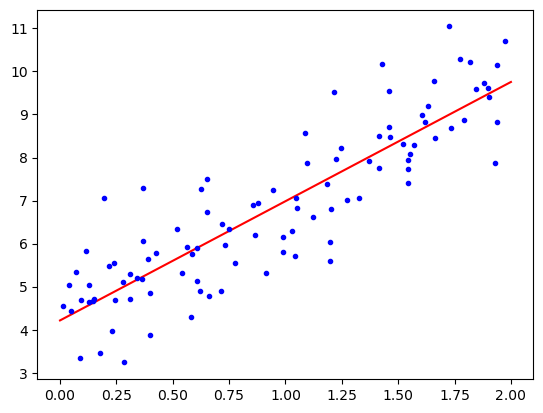

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [10]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50


def learning_schedule(t):
    return t0 / (t + t1)


np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [15]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [17]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

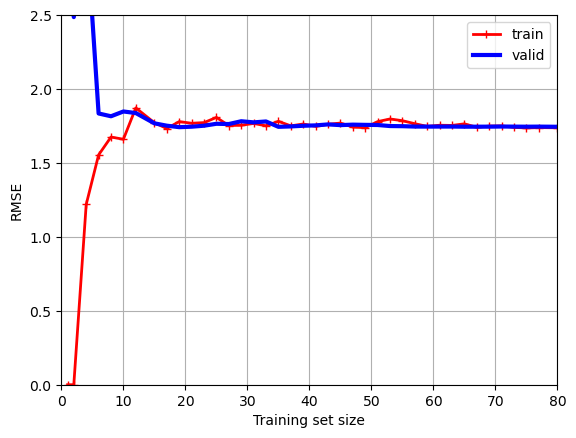

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y,
                                                         train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                                         scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

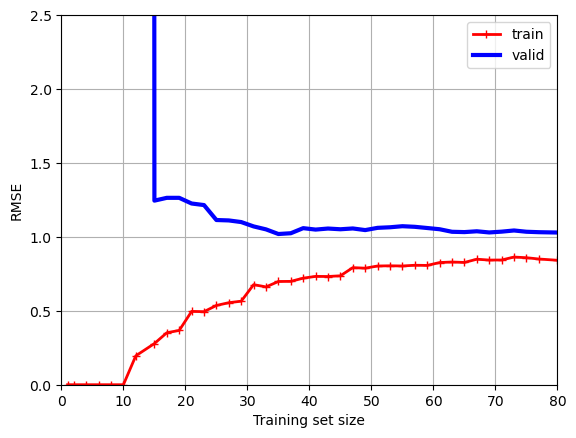

In [21]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y,
                                                         train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

In [22]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [23]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

In [24]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [25]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

In [26]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2:], y[m // 2:, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

In [27]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [29]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

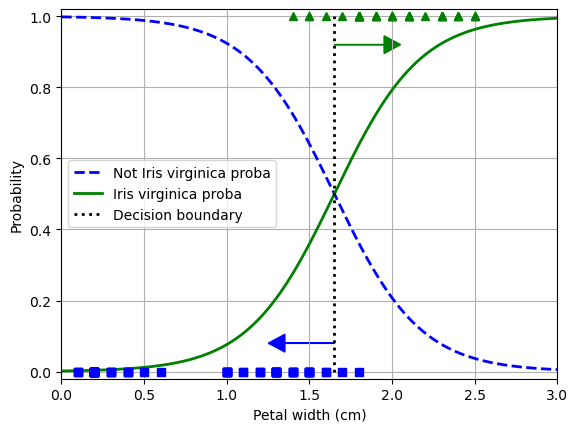

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

In [33]:
decision_boundary

1.6516516516516517

In [34]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [35]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [36]:
softmax_reg.predict([[5, 2]])

array([2])

In [37]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])